# Unsupervised Learning

In this notebook, we will demonstrate two clustering algorithms, Agglomerative Hierarchical Clustering and K-means clustering. You can read more documentation on the different clustering algorithms in Python [here](https://scikit-learn.org/stable/modules/clustering.html).


This notebook will:
1. Demonstrate preparing the dataset and visualizing it
2. Use two of scikit's clustering methods: Agglomerative Clustering and Kmeans
3. Expound on how to determine the best K for each method

Later on, we will also learn about different metrics that can help us choose the best k for our data.

In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

## Preparing the Dataset

We will be using a dataset on mall customers (sourced from [Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?select=Mall_Customers.csv)). This is a relevant use case for us: Clustering is a strategy often used in segmenting customers, which can be helpful in developing marketing techniques. We can look at the dataset in the code below:

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

While we can make use of all the features, for the sake of visualizing our data, we will cluster using two attributes: **Annual Income** and **Spending Score**. And since we are not dealing with labeled data, unlike with supervised learning algorithms, there is no need for us to split the data into training and test sets.

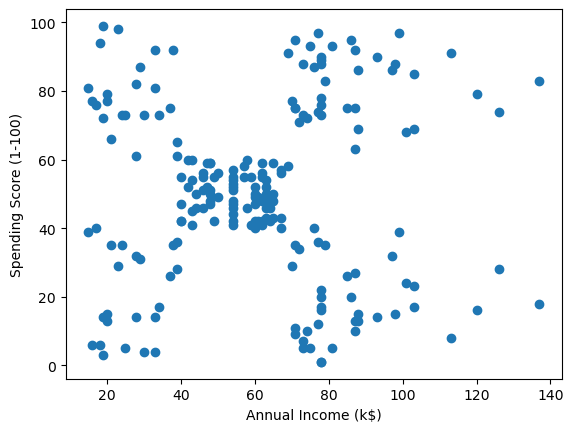

In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Scikit Clustering: Agglomerative Clustering

In this section, we will demonstrate how to use Scikit's **Agglomerative Clustering** and **KMeans**.

Note: while one crucial part of clustering is determining the _best K_ to use, for now we will assume that **K = 4**.

In [5]:
agg_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agg_model.fit(X)

AgglomerativeClustering(n_clusters=4)

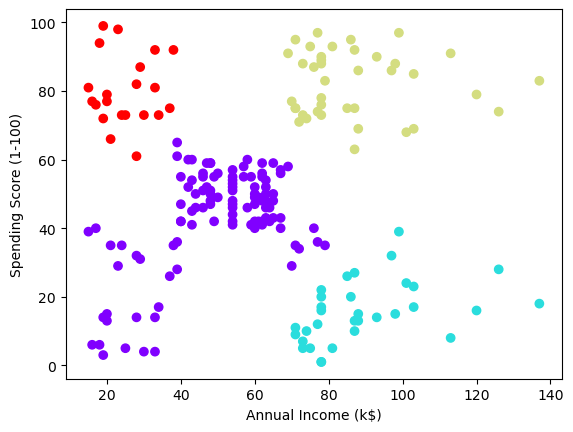

In [7]:
# plot
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=agg_model.labels_, cmap='rainbow')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Scikit Clustering: KMeans

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

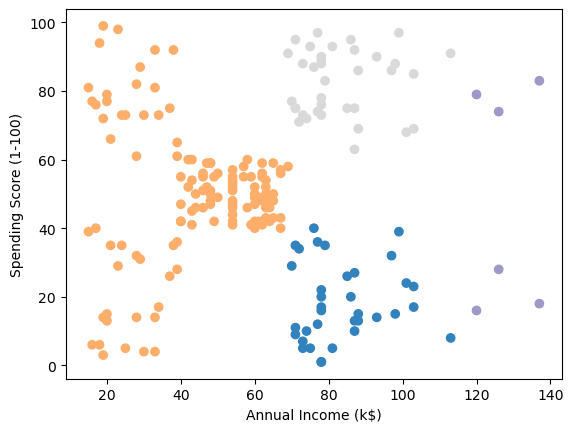

In [9]:
# plot
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans.labels_, cmap='tab20c')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Determining K: Hierarchical Clustering

Hierachical clustering refers to a family of clustering techniques that build nested clusters. The one we learned in class is known as **Agglomerative Hierarchical Clustering**, where each observation starts as one cluster and we keep merging the two closest clusters until everything belongs to one cluster.

Let's try to visualize the dendrogram for our dataset:

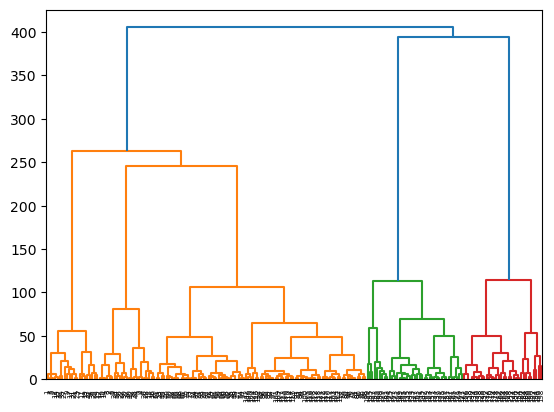

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), )

One way for us to choose the best number of clusters using a dendrogram is by finding the highest vertical distance that doesn't intersect with any clusters. This is because the greater the distance of the vertical lines in the dendrogram, the greater the distance between those clusters.

In our case, the greatest distance is with the middle orange line, which gives us **5 clusters**. We can mark it with a horizontal line:

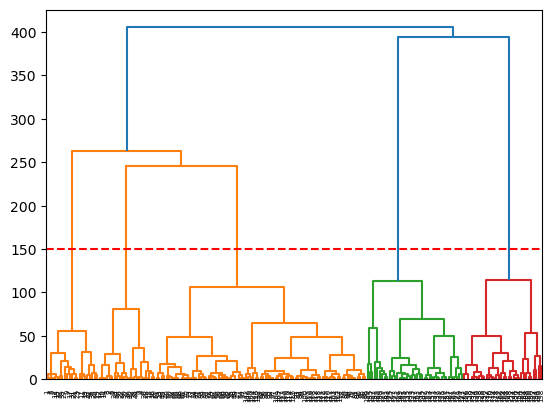

In [11]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y=150, color='r', linestyle='--')
plt.show()

After selecting the number of clusters, let's get the cluster labels for each data point.

In [ ]:
agg_model = AgglomerativeClustering(
  n_clusters=5, metric='euclidean', linkage='ward')
agg_model.fit(X)

AgglomerativeClustering(n_clusters=5)

Finally, let's match the cluster labels to each data point and visualize them.

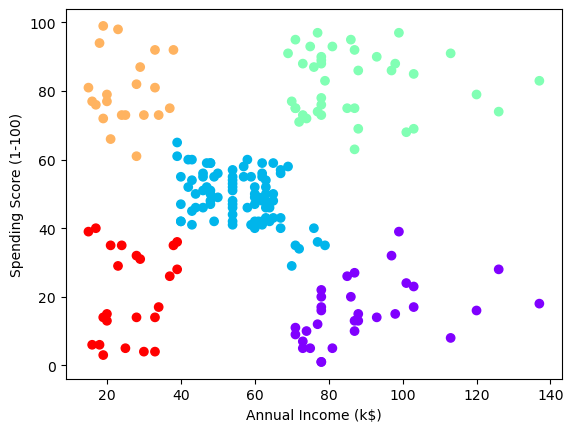

In [13]:
# plot
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=agg_model.labels_, cmap='rainbow')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Determining K: K-Means Clustering

There are multiple ways to find the best value of k (i.e., number of clusters) for K-means. We will learn two methods: 1) Elbow method and 2) silhouette scores.

### Elbow Method

For this method, let us try creating a model for a range of k values. For each model, we will calculate a metric known as **inertia**. For now, all you need to know is that inertia is the measure of how internally coherent clusters are: the lower the inertia, the better.

In [33]:
inertias = []
k_range = range(2, 15)

for k in k_range:
  km_model = KMeans(n_clusters=k, random_state=4).fit(X)
  inertias.append([k, km_model.inertia_])

inertias

[[2, 183653.32894736843],
 [3, 106348.37306211119],
 [4, 73880.64496247197],
 [5, 66674.36000494969],
 [6, 37233.814510710006],
 [7, 31616.50544361178],
 [8, 28103.23389388389],
 [9, 22858.450633665852],
 [10, 21278.290913541023],
 [11, 19705.916584381805],
 [12, 18429.92271713794],
 [13, 15614.18700285222],
 [14, 15319.598907614125]]

A good model has **low k** and **low inertia**; however, inertia decreases as k increases. So in order to choose the "best" model, we choose the k where the decrease in inertia begins to slow, or the **"elbow"** of the plot. In the elbow plot below, the elbow would be at **k = 5**.

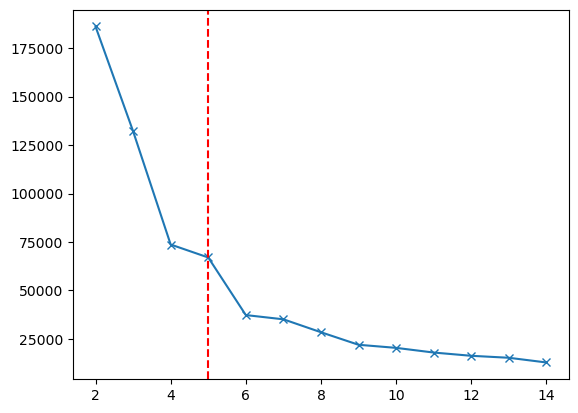

In [15]:
inertias = np.array(inertias)
plt.plot(inertias[:, 0], inertias[:, 1], 'x-')
plt.axvline(x=5, color='r', linestyle='--')
plt.show()

### Silhouette Score

The elbow method required a bit of eyeballing, and in some cases the optimal k may not be as clear. Another method we can use for choosing the best k is know as the **silhouette score**.

The silhouette score tells us how similar data points within a cluster are AND how different a cluster is from other clusters. Ideally, we want clusters where data points are very similar to each other (cohesion) and very different from other clusters (separation). The score ranges from -1 to 1, and we want a **high silhouette score** for our model.

For the range of k values, our best model has **k = 5** clusters.

In [16]:
for k in k_range:
  km_model = KMeans(n_clusters=k, random_state=0).fit(X)
  km_labels = km_model.predict(X)
  avg = silhouette_score(X, km_labels)
  print((k, round(avg, 4)))

(2, 0.3849)
(3, 0.4676)
(4, 0.4932)
(5, 0.5539)
(6, 0.4571)
(7, 0.4549)
(8, 0.4607)
(9, 0.4579)
(10, 0.4222)
(11, 0.4214)
(12, 0.406)
(13, 0.3932)
(14, 0.3849)


Finally, let's plot the different clusters. Although the number of clusters is the same as in the hierarchical clustering algorithm, you can actually look at the hierarchical clustering plot and see just a few differences in cluster assignments.

In [17]:
# create kmeans model with optimal k
km_model = KMeans(n_clusters=5, random_state=0).fit(X)
km_model.fit(X)

KMeans(n_clusters=5, random_state=0)

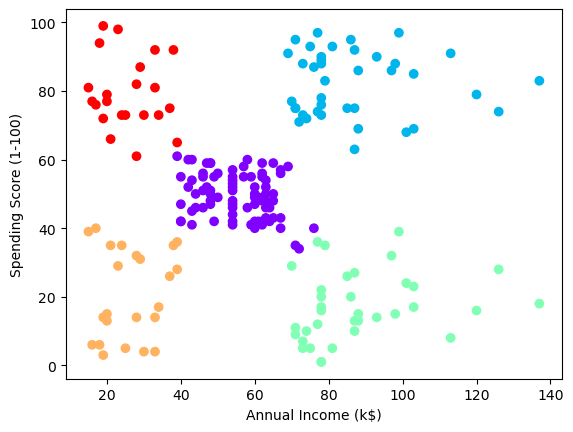

In [18]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=km_model.labels_, cmap='rainbow')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()